In [1]:
%load_ext sql

In [2]:
import csv, sqlite3


In [6]:
con = sqlite3.connect('socioeconomic.db')
cur = con.cursor()


In [7]:
%sql sqlite:///socioeconomic.db

In [8]:
import pandas

In [9]:
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

In [10]:
df.to_sql("chicago_socioeconomic_data", con , if_exists='replace')

78

In [11]:
%sql SELECT * FROM chicago_socioeconomic_data LIMIT 5;


 * sqlite:///socioeconomic.db
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [13]:
%sql select count(*) as count1 from chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


count1
78


In [14]:
%sql select count(community_area_name) from chicago_socioeconomic_data where hardship_index > 50

 * sqlite:///socioeconomic.db
Done.


count(community_area_name)
38


In [15]:
select max(hardship_index) from chicago_socioeconomic_data

SyntaxError: invalid syntax (3951864145.py, line 1)

In [16]:
%sql select max(hardship_index) from chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


max(hardship_index)
98.0


In [17]:
%sql select community_area_name from chicago_socioeconomic_data where\
per_capita_income_ > 60000

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [18]:
import seaborn

In [20]:
import matplotlib as plt

 * sqlite:///socioeconomic.db
Done.


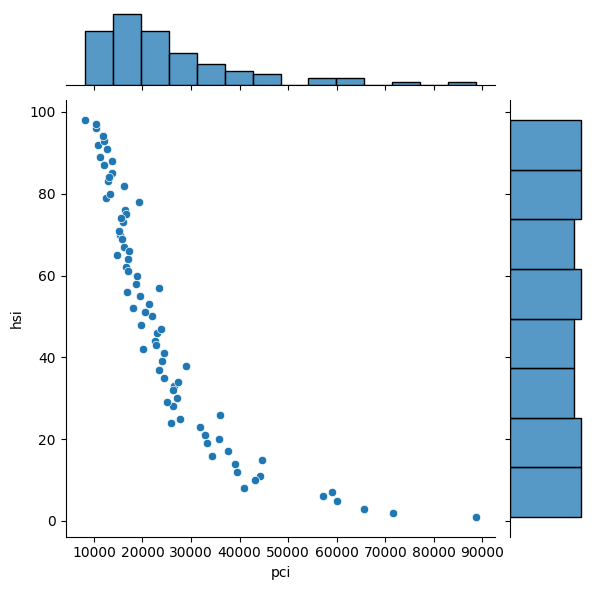

In [25]:
p_vs_h = %sql SELECT per_capita_income_ as pci , hardship_index as hsi from chicago_socioeconomic_data;
plot = seaborn.jointplot(x='pci', y='hsi', data=p_vs_h.DataFrame())